
# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)

- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Corelation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. (remember how we did a sns.pairplot(data[[ "cylinders", "mpg","model_year"]]) and sns.pairplot(data[["mpg", "horsepower", "weight", "displacement"]]) and others. ) 

remember to have fun with this 

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("./Lab_11_dataset/student_depression_dataset.csv")
data.head()

In [16]:
#wouldnt run in the markdown for obvious reasons
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory

#loads in data.csv and the libraries we needa use
shutil.move(path, "./Lab_11_dataset")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("./Lab_11_dataset/student_depression_dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


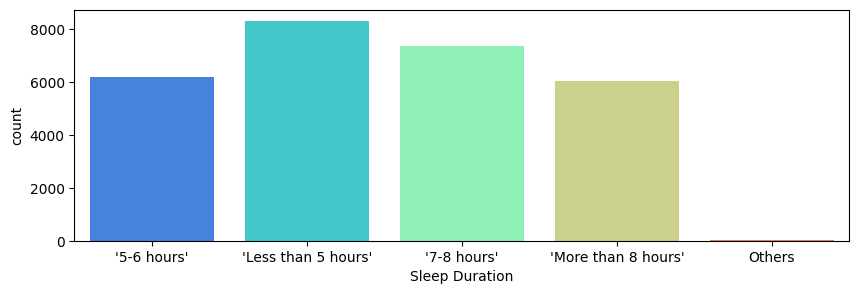

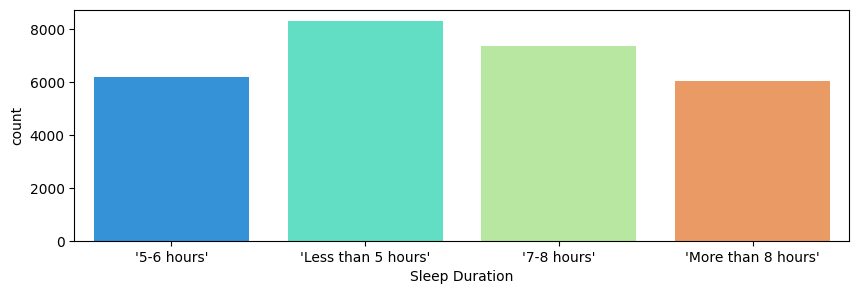

<Axes: xlabel='Depression', ylabel='Age'>

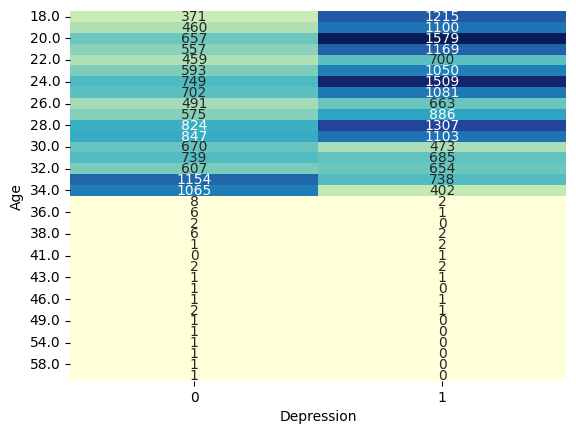

In [17]:
plt.figure(figsize = (10, 3))
sns.countplot(x = data["Sleep Duration"], data = data, palette = "rainbow", hue = "Sleep Duration",legend=False)
plt.show()

# remving others bc its not pretty with the graph, exaple of cleaning data
data = data[data["Sleep Duration"] != "Others"]
plt.figure(figsize = (10, 3))
sns.countplot(x = data["Sleep Duration"], data = data, palette = "rainbow", hue = "Sleep Duration",legend=False)
plt.show()

#couple lines were gptd just a fyi my b king
Age_and_Depression = data.groupby(["Age", "Depression"]).size().reset_index(name="Count")
data_pivot = Age_and_Depression.pivot(index="Age", columns="Depression", values="Count").fillna(0)
sns.heatmap(data_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)

C:\Users\2nd pc\AppData\Local\Temp\ipykernel_11428\3512802396.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_and_Depression = Age_and_Depression.groupby(["Age", "Depression"], as_index=False)["Count"].sum()


<Axes: xlabel='Depression', ylabel='Age'>

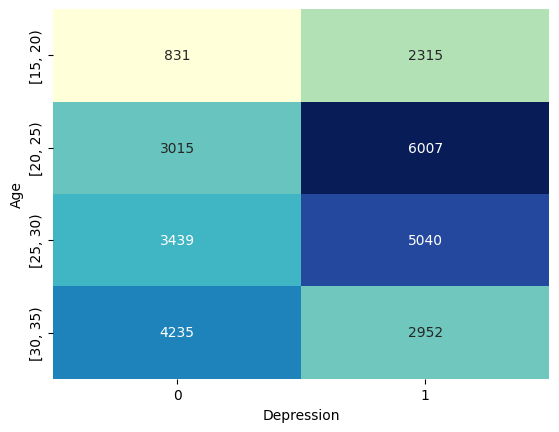

In [18]:


Age_and_Depression = data.groupby(["Age", "Depression"]).size().reset_index(name="Count")
Age_and_Depression["Age"] = pd.cut(Age_and_Depression["Age"], bins=[15, 20, 25, 30, 35,], right=False)

# error caused the data now being multiple sets and need to be added together per grouping
Age_and_Depression = Age_and_Depression.groupby(["Age", "Depression"], as_index=False)["Count"].sum()

# Create a pivot table for the heatmap
data_pivot = Age_and_Depression.pivot(index="Age", columns="Depression", values="Count").fillna(0)
sns.heatmap(data_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)


C:\Users\2nd pc\AppData\Local\Temp\ipykernel_11428\945792410.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_and_Depression = Age_and_Depression.groupby(["Age", "Depression"], as_index=False)["Count"].sum()


<Axes: xlabel='Depression', ylabel='Age'>

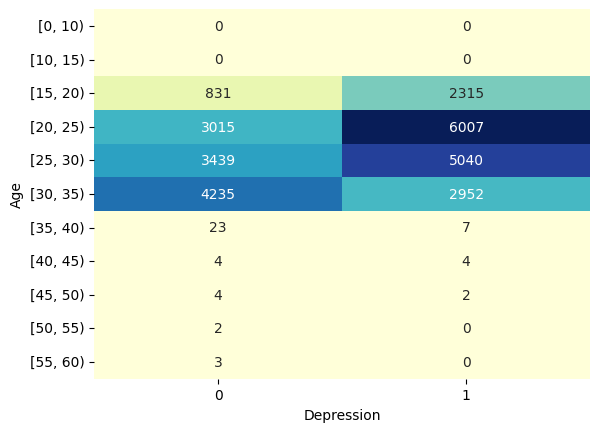

In [19]:
# impored the data by grouping ages with result of depression
Age_and_Depression = data.groupby(["Age", "Depression"]).size().reset_index(name="Count")
Age_and_Depression["Age"] = pd.cut(Age_and_Depression["Age"], bins=[0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], right=False)

Age_and_Depression = Age_and_Depression.groupby(["Age", "Depression"], as_index=False)["Count"].sum()

# Pivot and plot the new heatmap
data_pivot = Age_and_Depression.pivot(index="Age", columns="Depression", values="Count").fillna(0)
sns.heatmap(data_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)



had to split code up or else they overlapped for some reason very weird stuff

Assumptions:
    Clean visuals help understand trends better, so I grouped and simplified some categories.
    Age is treated as a numeric variable; in the final version, it's binned for clearer analysis.

What I learned:
   Students with less sleep or higher academic pressure often show more signs of depression.
     Grouping and heatmaps are helpful tools to uncover patterns that aren't visible in raw data





Ty for a informative semester sir its been good

also ty for tying to help me get my sd card working again, I ended up putting an emmc in it so i dont have to worry about brownouts as much

gg have a good summer